In [2]:
import pde
from pde import FieldCollection, PDEBase, UnitGrid
import numpy as np

In [36]:
#2d grid:
grid = pde.CartesianGrid([[-10,10],[-10,10]], [100, 100])

#Initial field for each concentration
#Look into change release site so there's a higher conentration in a smaller area, like in the pictures.
field_c_N = pde.ScalarField.from_expression(grid, "x**2 + y**2 <= 2**2", label="c_N field")

field_c_R = pde.ScalarField.from_expression(grid, "x**2 + y**2 <= 2**2", label="c_R field")
field_c_R.data = field_c_R.data*0.1

field_c_RN = pde.ScalarField(grid, label="c_RN field")
print("")
print(np.unique(field_c_N.data, return_counts=True))
print(np.unique(field_c_R.data, return_counts=True))
print(np.unique(field_c_RN.data, return_counts=True))

state = FieldCollection([field_c_N, field_c_R, field_c_RN])

epsilon = 1 #3.6309e-5
eta = 1 #0.80666


(array([0., 1.]), array([9684,  316], dtype=int64))
(array([0. , 0.1]), array([9684,  316], dtype=int64))
(array([0.]), array([10000], dtype=int64))


In [37]:
eq = pde.PDE({
    "c_N" : f"laplace(c_N) -{epsilon}*c_R*c_N + {eta}*c_RN",
    "c_R" : f"-{epsilon}*c_R*c_N +{eta}*c_RN",
    "c_RN" : f"{epsilon}*c_R*c_N -{eta}*c_RN",
    })

storage = pde.MemoryStorage()

In [53]:
result = eq.solve(state, t_range=20, dt=1e-3, tracker=["progress", storage.tracker(1e-3)])

100%|██████████| 20.0/20.0 [00:22<00:00,  1.12s/it]      


<class 'pde.storage.memory.MemoryStorage'>


100%|██████████| 30001/30001 [1:36:11<00:00,  5.20it/s]  


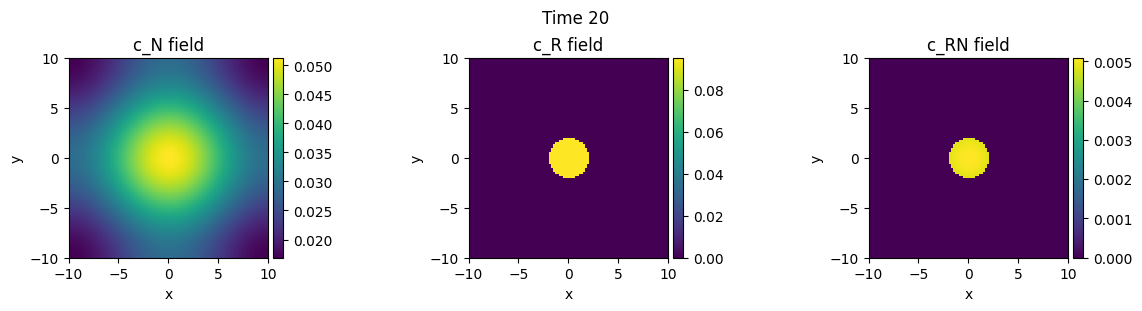

In [62]:
print(storage)
print(type(storage))
pde.movie(storage, filename="./Animations/res3.mp4")

In [61]:
t=1
print(np.shape(storage.data[t]))
print(storage.data[t][0])
print(np.sum(storage.data[t][0]))
print("")
print(storage.data[t][1])
print(np.sum(storage.data[t][1]))
print("")
print(storage.data[t][2])
print(np.sum(storage.data[t][2]))

(3, 100, 100)
[[1.11345904e-09 1.31707934e-09 1.75399897e-09 ... 1.75399897e-09
  1.31707934e-09 1.11345904e-09]
 [1.31707934e-09 1.55755767e-09 2.07349657e-09 ... 2.07349657e-09
  1.55755767e-09 1.31707934e-09]
 [1.75399897e-09 2.07349657e-09 2.75883090e-09 ... 2.75883090e-09
  2.07349657e-09 1.75399897e-09]
 ...
 [1.75399897e-09 2.07349657e-09 2.75883090e-09 ... 2.75883090e-09
  2.07349657e-09 1.75399897e-09]
 [1.31707934e-09 1.55755767e-09 2.07349657e-09 ... 2.07349657e-09
  1.55755767e-09 1.31707934e-09]
 [1.11345904e-09 1.31707934e-09 1.75399897e-09 ... 1.75399897e-09
  1.31707934e-09 1.11345904e-09]]
307.3864489526431

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
22.98644895264316

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
8.613551047356864
